<a id='#start'></a>
### Содержание

<a href='#step1'>1. Подготовка данных</a>

<a href='#step2'>2. Обучение моделей</a>

<a href='#step3'>3. Анализ моделей</a>

<a id='step1'></a>
# 1. Подготовка данных

In [1]:
import numpy as np
import seaborn as sns
import warnings
import matplotlib as plt

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from catboost import CatBoostRegressor
import lightgbm as lgb

In [2]:
try:
    df = pd.read_csv('/datasets/autos.csv')
except FileNotFoundError:
    df = pd.read_csv('autos.csv')

In [3]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [5]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
for col in df.columns:
    print('Доля пропусков в столбце {}: {:.2%}'.format(col, df[col].isna().sum()/df[col].count()))

Доля пропусков в столбце DateCrawled: 0.00%
Доля пропусков в столбце Price: 0.00%
Доля пропусков в столбце VehicleType: 11.83%
Доля пропусков в столбце RegistrationYear: 0.00%
Доля пропусков в столбце Gearbox: 5.93%
Доля пропусков в столбце Power: 0.00%
Доля пропусков в столбце Model: 5.89%
Доля пропусков в столбце Kilometer: 0.00%
Доля пропусков в столбце RegistrationMonth: 0.00%
Доля пропусков в столбце FuelType: 10.23%
Доля пропусков в столбце Brand: 0.00%
Доля пропусков в столбце NotRepaired: 25.12%
Доля пропусков в столбце DateCreated: 0.00%
Доля пропусков в столбце NumberOfPictures: 0.00%
Доля пропусков в столбце PostalCode: 0.00%
Доля пропусков в столбце LastSeen: 0.00%


In [7]:
corr_matrix = df[['Price','RegistrationYear','Power','Kilometer']].corr().abs()
corr_matrix.style.background_gradient(cmap='plasma', axis=None)

,Price,RegistrationYear,Power,Kilometer
Price,1,0.026916,0.158872,0.333199
RegistrationYear,0.026916,1,0.000828471,0.053447
Power,0.158872,0.000828471,1,0.0240019
Kilometer,0.333199,0.053447,0.0240019,1


Последовательно рассмотрим признаки.

### Изучение и предобработка

Удалим из датафрейма признаки, соответствующие датам создания и скачивания анкеты, дате последней активности пользователя и столбец *PostalCode*.

Удалим столбец *NumbetOfPictures*, поскольку он не несет полезной информации (все значения в нем - 0).

Основываясь на житейском опыте, удалим столбец *RegistrationMonth*, оставив при этом *RegistrationYear*. Зачастую на стоимость автомобиля влияет его возраст, но за редким ислючением кто-то обращает внимание на возраст автомобиля вплоть до месяца.

In [8]:
df = df.drop(['DateCrawled','RegistrationMonth','DateCreated','NumberOfPictures','PostalCode','LastSeen'], axis=1)

Text(0.5, 1.0, 'Распределение признака Kilometer')

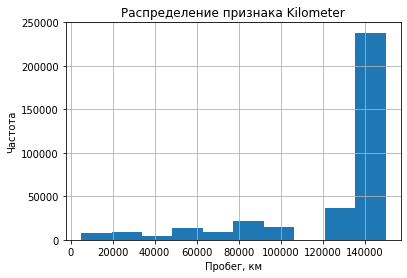

In [9]:
pl = df['Kilometer'].plot(kind='hist', grid=True)
pl.set_xlabel('Пробег, км')
pl.set_ylabel('Частота')
pl.set_title('Распределение признака Kilometer')

На гистограмме признака *Kilometer* каких-то особенностей не наблюдаем.

In [10]:
df['Brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

In [11]:
df['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

Столбцы *Model* и *Brand* имеют значительное количество уникальных значений, при этом они являются категориальными. Решение об их методе кодирования примем на следующем шаге.

In [12]:
df['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [13]:
df['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [14]:
df['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [15]:
df['NotRepaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

В столбцах *Kilometer*, *VehicleType*, *FuelType* заменим пропуски на значение **other**, которое позволит не терять данные из-за удаления, и которое уже присутствует в признаках.

В столбцах *Gearbox* и *NotRepaired* заменим пропуски на **uknown**.

In [16]:
df['Model'] = df['Model'].fillna('other')
df['VehicleType'] = df['VehicleType'].fillna('other')
df['FuelType'] = df['FuelType'].fillna('other')

df['NotRepaired'] = df['NotRepaired'].fillna('unknown')
df['Gearbox'] = df['Gearbox'].fillna('unknown')

Рассмотрим столбцы *RegistrationYear*, *Power* и *Price*:

In [17]:
def print_hist(df, params):
    plot = df[params[0]].plot(kind="hist", bins=params[1], range=(params[2][0],params[2][1]), grid=True,figsize=(8,6))
    plot.set_xlabel(params[3])
    plot.set_ylabel(params[4])
    plt.title(params[5])

Text(0.5, 1.0, 'Распределение признака RegistrationYear')

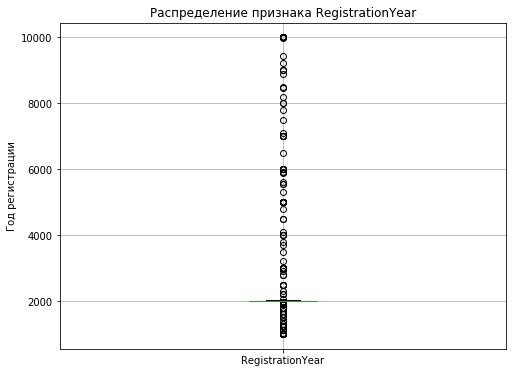

In [18]:
pl = df['RegistrationYear'].plot(kind='box', grid=True, figsize=(8,6))
pl.set_xlabel('')
pl.set_ylabel('Год регистрации')
pl.set_title('Распределение признака RegistrationYear')

Text(0.5, 1.0, 'Распределение признака RegistrationYear')

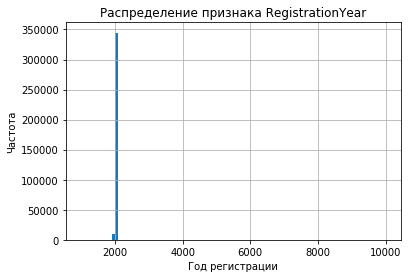

In [19]:
pl = df['RegistrationYear'].plot(kind='hist', bins=100, grid=True, figsize=(6,4))
pl.set_xlabel('Год регистрации')
pl.set_ylabel('Частота')
pl.set_title('Распределение признака RegistrationYear')

На распределении *RegistrationYear* наблюдается наличие аномальных годов выпуска из будущего. Оценим количество значений, которые сможем безболезненно отсечь и построим новое распределение с учетом введенных ограничений.

In [20]:
df[(df['RegistrationYear']>2019)]['RegistrationYear'].count()

105

In [21]:
df[(df['RegistrationYear']<1950)]['RegistrationYear'].count()

246

Text(0.5, 1.0, 'Распределение признака RegistrationYear')

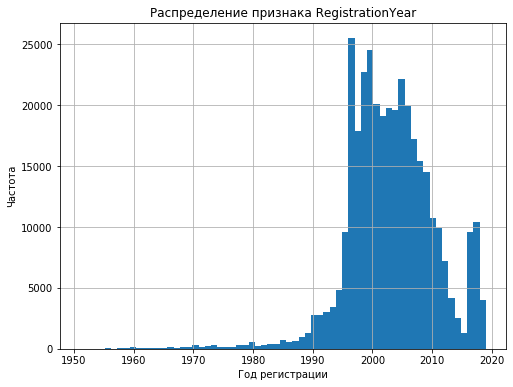

In [22]:
pl = df[(df['RegistrationYear']<=2019) & (df['RegistrationYear']>1950)]['RegistrationYear'].plot(kind='hist', bins=65,grid=True,
                                                                                                 figsize=(8,6))
pl.set_xlabel('Год регистрации')
pl.set_ylabel('Частота')
pl.set_title('Распределение признака RegistrationYear')

Text(0.5, 1.0, 'Распределение признака Price')

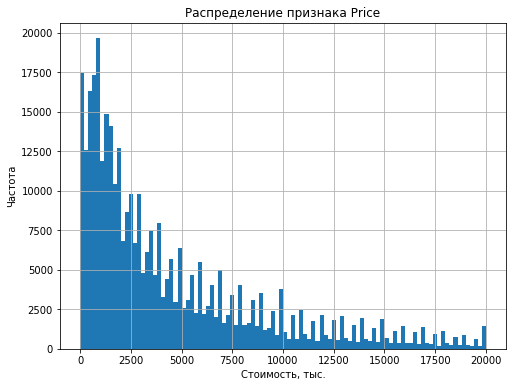

In [23]:
pl = df['Price'].plot(kind='hist',bins=100,figsize=(8,6), grid=True)
pl.set_xlabel('Стоимость, тыс.')
pl.set_ylabel('Частота')
pl.set_title('Распределение признака Price')

In [24]:
df['Price'].value_counts()

0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
13440        1
1414         1
8069         1
10370        1
384          1
Name: Price, Length: 3731, dtype: int64

Удалим из выборки строки со значением целевого признака *Price*, равным нулю, таких значений всего 3% и они бесполезны для обучения.

Text(0.5, 1.0, 'Распределение признака Power')

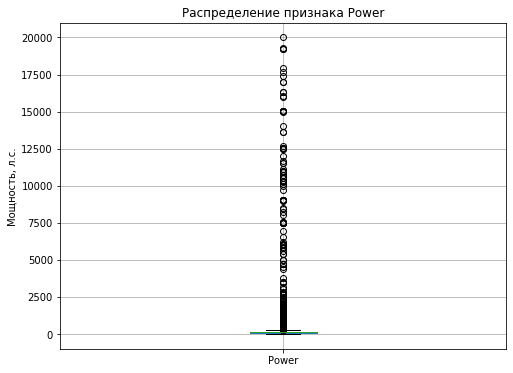

In [25]:
pl = df['Power'].plot(kind='box', grid=True, figsize=(8,6))
pl.set_xlabel('')
pl.set_ylabel('Мощность, л.с.')
pl.set_title('Распределение признака Power')

Text(0.5, 1.0, 'Распределение признака Power')

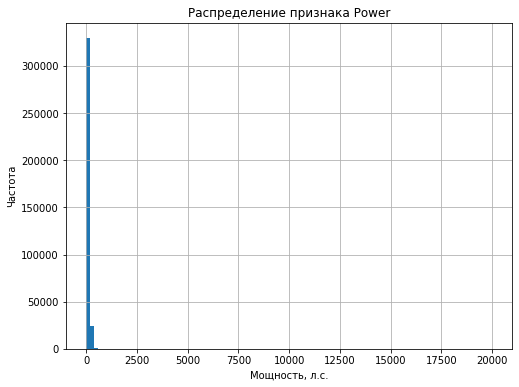

In [26]:
pl = df['Power'].plot(kind='hist',bins=100,figsize=(8,6), grid=True)
pl.set_xlabel('Мощность, л.с.')
pl.set_ylabel('Частота')
pl.set_title('Распределение признака Power')

Наблюдаем выбросы с объявлениями с нереалистичной мощностью авто. Помимо этого оценим количество авто с нулевой мощностью.

In [27]:
df[df['Power']>900]['Power'].count()

329

In [28]:
df[df['Power']==0]['Power'].count()

40225

Text(0.5, 1.0, 'Распределение отфильтрованного признака Power')

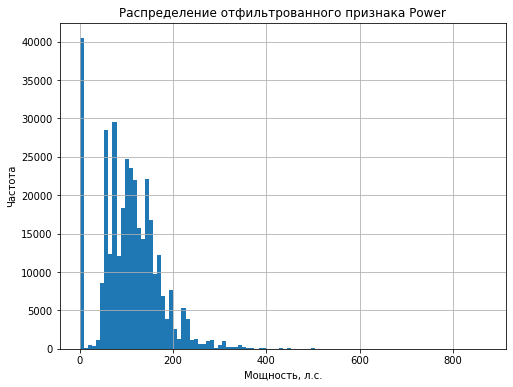

In [29]:
pl = df[df['Power']<900]['Power'].plot(kind='hist',bins=100,figsize=(8,6), grid=True)
pl.set_xlabel('Мощность, л.с.')
pl.set_ylabel('Частота')
pl.set_title('Распределение отфильтрованного признака Power')

Заменим в столбце *Power* значения, равные 0, на среднее для конкретной модели авто.

In [30]:
df = df[df['Price']!=0]

In [31]:
mean_power = df.groupby('Model')['Power'].mean().to_dict()

In [32]:
def fill_power_nulls(row, power_dict):
    if row['Power']==0:
        return power_dict[row['Model']]
    else:
        return row['Power']

In [33]:
df = df[df['Power']<900]

Text(0.5, 1.0, 'Распределение признака Power после обработки')

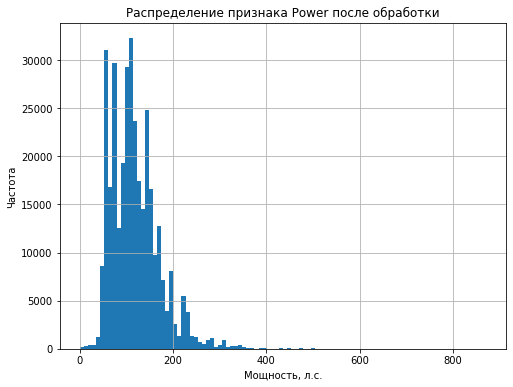

In [34]:
df['Power'] = df.apply(fill_power_nulls, power_dict=mean_power, axis=1)
pl = df['Power'].plot(kind='hist',bins=100,figsize=(8,6), grid=True)
pl.set_xlabel('Мощность, л.с.')
pl.set_ylabel('Частота')
pl.set_title('Распределение признака Power после обработки')

In [35]:
df = df[(df['RegistrationYear']<=2019) & (df['RegistrationYear']>1950)]

## Выводы

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343013 entries, 0 to 354368
Data columns (total 10 columns):
Price               343013 non-null int64
VehicleType         343013 non-null object
RegistrationYear    343013 non-null int64
Gearbox             343013 non-null object
Power               343013 non-null float64
Model               343013 non-null object
Kilometer           343013 non-null int64
FuelType            343013 non-null object
Brand               343013 non-null object
NotRepaired         343013 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 28.8+ MB


In [37]:
for col in df.columns:
    print('Доля пропусков в столбце {}: {:.2%}'.format(col, df[col].isna().sum()/df[col].count()))

Доля пропусков в столбце Price: 0.00%
Доля пропусков в столбце VehicleType: 0.00%
Доля пропусков в столбце RegistrationYear: 0.00%
Доля пропусков в столбце Gearbox: 0.00%
Доля пропусков в столбце Power: 0.00%
Доля пропусков в столбце Model: 0.00%
Доля пропусков в столбце Kilometer: 0.00%
Доля пропусков в столбце FuelType: 0.00%
Доля пропусков в столбце Brand: 0.00%
Доля пропусков в столбце NotRepaired: 0.00%


In [38]:
df.describe()

,Price,RegistrationYear,Power,Kilometer
count,343013.000000,343013.000000,343013.000000,343013.00000
mean,4556.460152,2003.211272,118.510173,128415.90552
std,4514.699039,7.203562,52.869546,37405.27175
min,1.000000,1951.000000,0.000000,5000.00000
25%,1200.000000,1999.000000,75.000000,125000.00000
50%,2890.000000,2003.000000,109.000000,150000.00000
75%,6500.000000,2008.000000,143.000000,150000.00000
max,20000.000000,2019.000000,871.000000,150000.00000


In [39]:
corr_matrix = df[['Price','RegistrationYear','Power','Kilometer']].corr().abs()
corr_matrix.style.background_gradient(cmap='plasma', axis=None)

,Price,RegistrationYear,Power,Kilometer
Price,1,0.385612,0.501206,0.352267
RegistrationYear,0.385612,1,0.0994497,0.201482
Power,0.501206,0.0994497,1,0.0986023
Kilometer,0.352267,0.201482,0.0986023,1


В обработанном датафрейме не наблюдается сильных корреляций и выбросов в оставшихся параметрах.

Приступим к обучению моделей.

<a href='#start'>К содержанию</a>

<a id='step2'></a>
# 2. Обучение моделей

Подготовим выборки для обучения моделей LightGBM, случайного леса и логистической регрессии, закодировав категориальные признаки.

Для обучения с использованием CatBoost воспользуемся предобработанной выборкой без кодирования, поскольку указанная библиотеки имеет встроенные механизмы кодирования.

### Подготовка кодированных выборок

Воспользуемся функцией кодирования средним для категорий с большим количеством вариантов - *Model* и *Brand*. Для остальных категорий применим технику OHE.

In [40]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


#функция найдена на просторах интернета, не самописная :)
def make_mean_encoding(df_tr, target_col_name, feature_col_name):
    y_tr = df_tr[target_col_name].values
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=123)
    train_new = df_tr.copy()
 
    global_mean = df_tr[target_col_name].mean()
    train_new[feature_col_name + '_mean_target'] = global_mean
 
    for tr_ind, val_ind in skf.split(y_tr, y_tr):
        X_tr, X_val = df_tr.iloc[tr_ind], df_tr.iloc[val_ind]
        for col in [feature_col_name]:
            means = X_val[col].map(X_tr.groupby(col)[target_col_name].mean())
            X_val[col + '_mean_target'] = means
        train_new.iloc[val_ind] = X_val
 
    train_new.fillna(global_mean, inplace=True)
 
    return train_new

In [42]:
df_encoded = make_mean_encoding(df, 'Price', 'Model')
df_encoded = make_mean_encoding(df_encoded, 'Price', 'Brand')
df_encoded = df_encoded.drop(['Model' ,'Brand'], axis=1)
df_encoded = pd.get_dummies(df_encoded, drop_first=True)
df_encoded.head()

,Price,RegistrationYear,Power,Kilometer,Model_mean_target,Brand_mean_target,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,...,Gearbox_manual,Gearbox_unknown,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,NotRepaired_unknown,NotRepaired_yes
0,480,1993,98.307548,150000,4319.838925,4541.638094,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
1,18300,2011,190.000000,125000,4045.946856,6413.853907,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,9800,2004,163.000000,125000,6466.674074,7318.968454,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1500,2001,75.000000,150000,4280.313851,4530.268944,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,3600,2008,69.000000,90000,4237.730539,5984.638753,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


Получим обучающую и тестовую выборки. Валидационная выборка не потребуется, поскольку будем использовать кросс-валидацию при обучении.

In [43]:
target_encoded = df_encoded['Price']
features_encoded = df_encoded.drop('Price', axis=1)

features_encoded_train, features_encoded_test, target_encoded_train, target_encoded_test = train_test_split(
    features_encoded, target_encoded, test_size=0.2, random_state=127)

In [44]:
print(features_encoded_train.shape)
print(features_encoded_test.shape)

(274410, 22)
(68603, 22)


Проведем масштабирование призанков *RegistrationYear*, *Power*, *Kilometer*, *Model_mean_target*, *Brand_mean_target*.

In [45]:
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'Model_mean_target', 'Brand_mean_target']

scaler = StandardScaler()
scaler.fit(features_encoded_train[numeric])
features_encoded_train[numeric] = scaler.transform(features_encoded_train[numeric])
features_encoded_test[numeric] = scaler.transform(features_encoded_test[numeric])

### Подготовка некодированных выборок

Аналогично кодированным, проведем подготовку некодированных выборок.

In [46]:
target = df['Price']
features = df.drop('Price', axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=127)

In [47]:
print(features_train.shape)
print(features_test.shape)

(274410, 9)
(68603, 9)


Проведем масштабирование призанков *RegistrationYear*, *Power*, *Kilometer*.

In [48]:
numeric = ['RegistrationYear', 'Power', 'Kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Обучение моделей

In [49]:
def rmse(trgt, pred):
    return mean_squared_error(trgt, pred) ** 0.5
rmse_scorer = make_scorer(rmse,greater_is_better=False)

In [50]:
rmse_scorer2 = make_scorer(rmse,greater_is_better=True)

In [51]:
result_array = []

#### Линейная регрессия

In [52]:
%%time
model_lin_reg = LinearRegression()
cv_lin_reg = cross_val_score(model_lin_reg, features_encoded_train, target_encoded_train, cv=3, scoring=rmse_scorer)
rmse_lr = np.mean(cv_lin_reg)
print('Среднее значение RMSE для линейной регрессии при кросс-валидации:', rmse_lr)

Среднее значение RMSE для линейной регрессии при кросс-валидации: -2789.347733900202
CPU times: user 1.16 s, sys: 510 ms, total: 1.67 s
Wall time: 1.69 s


In [53]:
cv_lin_reg = cross_val_score(model_lin_reg, features_encoded_train, target_encoded_train, cv=3, scoring=rmse_scorer2)
rmse_lr = np.mean(cv_lin_reg)
print('Среднее значение RMSE для линейной регрессии при кросс-валидации для альтернативной функции scorer:', rmse_lr)

Среднее значение RMSE для линейной регрессии при кросс-валидации для альтернативной функции scorer: 2789.347733900202


In [54]:
%%time
model_lin_reg.fit(features_encoded_train, target_encoded_train)

CPU times: user 379 ms, sys: 159 ms, total: 538 ms
Wall time: 610 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
%%time
lr_pred = model_lin_reg.predict(features_encoded_test)

CPU times: user 23.4 ms, sys: 20.4 ms, total: 43.8 ms
Wall time: 13.7 ms


In [56]:
result_array.append(['LR', rmse(target_encoded_test, lr_pred), np.abs(rmse_lr), 0.268, 0.020])

#### CatBoostRegressor

In [57]:
%%time

cb_random_grid = {
    'depth': [int(x) for x in range(2, 16, 3)],
    'learning_rate' : [float(x) for x in np.arange(0.01, 0.3, 0.03)],
    'iterations': [150, 200]
}

cb = CatBoostRegressor()

random_search_cb = RandomizedSearchCV(cv=3, param_distributions=cb_random_grid, n_jobs=-1, scoring=rmse_scorer, estimator=cb, n_iter=50, random_state=127)
#random_search_cb.fit(features_encoded_train, target_encoded_train)
#random_search_cb.best_params_

CPU times: user 235 µs, sys: 18 µs, total: 253 µs
Wall time: 229 µs


Wall time: 33min 32s

{'learning_rate': 0.19, 'iterations': 200, 'depth': 14}

In [58]:
%%time

cb_param_grid = {
    'depth': [12, 14, 16],
    'learning_rate' : [0.18, 0.19, 0.20],
    'iterations': [200]
}

grid_searhc_cb = GridSearchCV(estimator = cb, param_grid = cb_param_grid, cv = 3, scoring=rmse_scorer, n_jobs=-1)

#grid_searhc_cb.fit(features_encoded_train, target_encoded_train)
#grid_searhc_cb.best_params_

CPU times: user 0 ns, sys: 37 µs, total: 37 µs
Wall time: 41.7 µs


Wall time: 34min 40s

{'depth': 14, 'iterations': 200, 'learning_rate': 0.18}

In [59]:
%%time
cb_top = CatBoostRegressor(depth=14, iterations=200, learning_rate=0.18)
cb_top.fit(features_encoded_train, target_encoded_train, verbose=0)

CPU times: user 2min 23s, sys: 17.4 s, total: 2min 40s
Wall time: 2min 51s


Wall time: 1min 11s

In [60]:
%%time
cb_pred = cb_top.predict(features_encoded_test)

CPU times: user 212 ms, sys: 23.4 ms, total: 235 ms
Wall time: 202 ms


Wall time: 120 ms


In [61]:
print('Значение RMSE для лучшей модели CatBoost:',rmse(target_encoded_test, cb_pred))
result_array.append(['CatBoost', rmse(target_encoded_test, cb_pred), 1621.248470, 71, 0.120]) #np.abs(grid_searhc_cb.best_score_)

Значение RMSE для лучшей модели CatBoost: 1593.1229579474284


#### Случайный лес

In [62]:
forest_param_grid = {
    'max_depth': [int(x) for x in range(15,46,10)],
    'n_estimators': [int(x) for x in range(80,131,10)]
}

rf = RandomForestRegressor(random_state=127)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = forest_param_grid, cv = 3, scoring=rmse_scorer, n_jobs=-1)

In [63]:
%%time

grid_search_rf.fit(features_encoded_train, target_encoded_train)
grid_search_rf.best_params_

Wall time: 38min 52s

{'max_depth': 25, 'n_estimators': 130}

In [64]:
%%time

rfr = RandomForestRegressor(random_state=127, max_depth=25, n_estimators=130, n_jobs=-1)
rfr.fit(features_encoded_train, target_encoded_train)

CPU times: user 3min 16s, sys: 928 ms, total: 3min 17s
Wall time: 3min 19s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=-1,
                      oob_score=False, random_state=127, verbose=0,
                      warm_start=False)

Wall time: 58.1 s

In [65]:
%%time
rfr_pred = rfr.predict(features_encoded_test)

CPU times: user 4.71 s, sys: 0 ns, total: 4.71 s
Wall time: 4.74 s


Wall time: 1.19 s

In [66]:
print('Значение RMSE для лучшей модели Случайного леса:',rmse(target_encoded_test, rfr_pred))
result_array.append(['RF', rmse(target_encoded_test, rfr_pred), 1668.702373, 58.1, 1.19]) 

Значение RMSE для лучшей модели Случайного леса: 1628.4856936591493


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 4:
    
Отличный результат, молодец, что оцениваешь время работы модели.
</div>

#### Light GBM

In [67]:
%%time

lgbm_random_grid = {
    'max_depth': [int(x) for x in range(2, 30, 3)],
    'learning_rate' : [float(x) for x in np.arange(0.01, 0.3, 0.03)],
    'feature_fraction': [0.7, 0.8, 0.9, 1.0],
    'num_iterations' : [100, 150, 200, 250, 300],
    'num_leaves': [int(x) for x in range(20,50,2)]
}

lgbm = lgb.LGBMRegressor(random_state=127)

random_search_lgbm = RandomizedSearchCV(cv=3, param_distributions=lgbm_random_grid, n_jobs=-1, scoring=rmse_scorer, estimator=lgbm, n_iter=100, random_state=127)
random_search_lgbm.fit(features_encoded_train, target_encoded_train)
random_search_lgbm.best_params_

CPU times: user 250 µs, sys: 0 ns, total: 250 µs
Wall time: 173 µs


Wall time: 6min 10s

{'num_leaves': 46,
 'num_iterations': 300,
 'max_depth': 14,
 'learning_rate': 0.25,
 'feature_fraction': 1.0}

In [68]:
%%time

lgbm_grid = {
    'max_depth': [13, 14, 15],
    'learning_rate' : [0.24, 0.25, 0.26],
    'feature_fraction': [1.0],
    'num_leaves': [44,46,48],
    'num_iterations' : [300]
}

grid_searhc_lgbm = GridSearchCV(estimator = lgbm, param_grid = lgbm_grid, cv = 3, scoring=rmse_scorer, n_jobs=-1)

grid_searhc_lgbm.fit(features_encoded_train, target_encoded_train)
grid_searhc_lgbm.best_params_

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 41.2 µs


Wall time: 2min 9s

{'feature_fraction': 1.0,
 'learning_rate': 0.24,
 'max_depth': 13,
 'num_iterations': 300,
 'num_leaves': 44}

In [69]:
%%time

lgbm = lgb.LGBMRegressor(feature_fraction=1.0, learning_rate=0.24, max_depth=13, num_iterations=300, num_leaves=44, random_state=127)
lgbm.fit(features_encoded_train, target_encoded_train)

CPU times: user 26.2 s, sys: 178 ms, total: 26.4 s
Wall time: 26.8 s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=1.0, importance_type='split', learning_rate=0.24,
              max_depth=13, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_iterations=300, num_leaves=44, objective=None,
              random_state=127, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Wall time: 2.29 s

In [70]:
%%time
lgbm_pred = lgbm.predict(features_encoded_test)

CPU times: user 2.12 s, sys: 787 µs, total: 2.13 s
Wall time: 2.19 s


Wall time: 278 ms

In [71]:
print('Значение RMSE для лучшей модели LightGBM:', rmse(target_encoded_test,lgbm_pred))
result_array.append(['LGBM', rmse(target_encoded_test,lgbm_pred), 1621.734945, 2.29, 0.278]) #np.abs(grid_searhc_lgbm.best_score_)

Значение RMSE для лучшей модели LightGBM: 1601.0454491337046


<a href='#start'>К содержанию</a>

<a id='step3'></a>
# 3. Анализ моделей

In [72]:
pd.DataFrame(result_array, columns = ['Model','Test RMSE', 'CV RMSE', 'Learn Time', 'Predict Time'])

,Model,Test RMSE,CV RMSE,Learn Time,Predict Time
0,LR,2785.448827,2789.347734,0.268,0.020
1,CatBoost,1593.122958,1621.248470,71.000,0.120
2,RF,1628.485694,1668.702373,58.100,1.190
3,LGBM,1601.045449,1621.734945,2.290,0.278


Рассмотрим результаты обучения моделей.

Худшей моделью оказалась модель *линейной регрессии*, показавшей наименьшее время обучения модели, однако имеющая значение **RMSE**, равное **2785**.

Модели *случайного леса*, *LGBM* и *CatBoost* показали близкие результаты по показателю **RMSE** - около **1600**. 
Наблюдается значительная разница во **времени обучения** - лидером по этому показателю со значением **2.29** секунды является _LGBM_. 
Не смотря на превосходство _CatBoost_ в скорости предсказания над _LGBM_ (**0.120** против **0.278**), по совокупным показателям лучшей моделью под критерии заказчика выберем модель ***LGBM*** со следующими параметрами:

- 'feature_fraction': 1.0
- 'learning_rate': 0.24
- 'max_depth': 13
- 'num_iterations': 300
- 'num_leaves': 44


<a href='#start'>К содержанию</a>